<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [ ]:
!python -m spacy download en_core_web_md

In [1]:
""" Import Statements """

# Classics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_md")
import en_core_web_md
nlp = en_core_web_md.load()

In [2]:
import re
import string

from bs4 import BeautifulSoup
import requests

In [3]:
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP.git

Cloning into 'DS-Unit-4-Sprint-1-NLP'...
remote: Enumerating objects: 1528, done.
remote: Total 1528 (delta 0), reused 0 (delta 0), pack-reused 1528
Receiving objects: 100% (1528/1528), 56.37 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (169/169), done.


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [5]:
df = pd.read_csv('job_listings.csv')
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [11]:
text = df['description'][0]
soup = BeautifulSoup(text, 'html.parser')

In [18]:
soup2 = eval(soup.get_text())

In [22]:
good_text = soup2.decode('utf-8')
good_text

"Job Requirements:\nConceptual understanding in Machine Learning models like Nai¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"

In [23]:
good_text.replace('\n', ' ')

"Job Requirements: Conceptual understanding in Machine Learning models like Nai¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"

In [33]:
def remove_html(text):
    """
    Extract text from html boiler plate code. 
    Converts bytes dtype into str dtype
    
    Note
    ----
    Use the regex editor to help you create regular expressions https://regex101.com/
    
    Parameters
    ----------
    text: string or object 
        contains text data that we want to clean
    
    Returns 
    -------
    text: str 
        cleaned text data ready for vectorization
    """
    
    # create soup object 
    soup = BeautifulSoup(text, 'html.parser')
    
    # extract text from page using beautiful soup
    # eval will strip off whatever datatype or expression that's inside of a string, 
    # see https://docs.python.org/3/library/functions.html#eval for eval docs
    text =  eval(soup.get_text())
    
    # if text is a byte data type, then convert to string 
    if isinstance(text, str) == False:
        
        # convert byte data type into str
        text =  text.decode('utf-8')
        
    
    # use regex to clean your text data
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    
    # case normalize and strip extra white spaces on the far left and right hand side
    text = text.lower().strip()
    return text

In [36]:
df['text'] = df['description'].apply(lambda x: remove_html(x))
df.head()

,Unnamed: 0,description,title,text
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,job requirements conceptual understanding in m...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,job description as a data scientist you will h...
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,as a data scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,a monthcontractunder the general supervision o...
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,location usa multiple locations years of analy...


## 2) Use Spacy to tokenize the listings 

In [51]:
##### Your Code Here #####
def spacy_tokens(text):
  tokens = []
  for token in nlp(text):
    if (token.is_stop != True) & (token.is_punct != True) & (token.is_digit != True):
      tokens.append(token.lemma_)
  return tokens

In [52]:
df['spacy_tokens'] = df['text'].apply(lambda x: spacy_tokens(x))
df.head()

,Unnamed: 0,description,title,text,spacy_tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,job requirements conceptual understanding in m...,"[job, requirement, conceptual, understanding, ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,job description as a data scientist you will h...,"[job, description, data, scientist, help, buil..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,as a data scientist you will be working on con...,"[data, scientist, work, consult, business, res..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,a monthcontractunder the general supervision o...,"[monthcontractunder, general, supervision, pro..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,location usa multiple locations years of analy...,"[location, usa, multiple, location, year, anal..."


In [84]:
df['lemma_text'] = [' '.join(text) for text in df['spacy_tokens']]
df.head()

,Unnamed: 0,description,title,text,spacy_tokens,lemma_text
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,job requirements conceptual understanding in m...,"[job, requirement, conceptual, understanding, ...",job requirement conceptual understanding machi...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,job description as a data scientist you will h...,"[job, description, data, scientist, help, buil...",job description data scientist help build mach...
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,as a data scientist you will be working on con...,"[data, scientist, work, consult, business, res...",data scientist work consult business responsib...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,a monthcontractunder the general supervision o...,"[monthcontractunder, general, supervision, pro...",monthcontractunder general supervision profess...
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,location usa multiple locations years of analy...,"[location, usa, multiple, location, year, anal...",location usa multiple location year analytic e...


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [59]:
def count_vectorize(column):
  text = []
  for row in column:
    text.append(row)

  vector = CountVectorizer(stop_words='english', max_features=100)
  vector.fit(text)
  transformed = vector.transform(text)
  dense = transformed.todense()

  df = pd.DataFrame(dense, columns = vector.get_feature_names())
  return df


In [85]:
vector1 = count_vectorize(df['lemma_text'])
print(f'Shape of original df: {df.shape}, shape of count vector: {vector1.shape}.')

Shape of original df: (426, 6), shape of count vector: (426, 100).


In [86]:
vector1

,ability,advanced,algorithm,analysis,analytic,analytical,analyze,apply,build,business,client,communication,company,complex,computer,create,customer,data,datum,decision,degree,deliver,design,develop,development,drive,engineering,environment,experience,field,good,help,identify,impact,improve,include,information,insight,job,knowledge,...,predictive,problem,process,product,project,provide,python,qualification,quantitative,require,requirement,research,responsibility,result,role,science,scientist,service,set,skill,software,solution,solve,source,sql,statistic,statistical,status,strong,support,team,technical,technique,technology,tool,understanding,use,work,world,year
0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,2,1,3,1,3,1,1,0,4,3,4,1,0,3,7,1,2,3,1,1,1,0,2,0,1,0,...,0,2,1,2,0,0,1,1,0,0,0,0,0,1,0,2,1,1,0,2,0,0,2,1,1,0,0,0,2,0,5,3,0,0,0,1,0,6,1,1
2,1,1,1,0,1,1,1,1,1,3,0,1,0,1,1,0,0,2,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,2,0,0,2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,1,2,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2,0,0,0,0,0,3,3,1,4,0,1,3,0,0,1,2,2,10,0,0,2,0,0,0,2,1,1,6,0,0,2,0,3,4,3,1,3,2,0,...,0,0,0,1,3,1,1,1,0,0,1,0,1,0,2,5,1,0,2,0,0,4,0,0,0,0,0,3,1,2,10,0,1,1,1,1,0,1,0,5
422,0,0,1,1,0,0,0,0,2,0,0,0,0,1,1,1,0,0,2,1,0,0,1,4,0,0,1,0,1,0,1,3,0,0,0,1,0,0,0,1,...,0,2,0,1,1,0,0,0,1,0,0,2,0,0,1,2,2,0,1,0,0,0,0,0,0,1,2,0,1,0,4,0,1,1,1,0,1,3,3,0
423,0,2,0,0,0,0,0,0,3,1,0,0,1,1,0,0,1,0,2,0,0,0,1,0,0,2,0,0,3,0,1,2,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,2,0,0,3,1,0,0,0,1,2,0,1,0,2,0,2,0,1,0,0,0,2,0,1,1,0,0,1,2,0,1,0,2,1
424,0,0,0,2,0,0,2,4,0,1,0,1,1,0,1,0,1,5,9,0,1,2,0,0,1,0,0,1,9,0,0,0,0,0,0,0,2,1,1,3,...,0,0,0,1,0,2,5,1,2,0,2,0,0,1,2,7,2,0,0,1,1,1,0,2,1,1,2,3,1,1,4,0,1,0,0,0,0,5,1,1


## 4) Visualize the most common word counts

In [65]:
##### Your Code Here #####
from collections import Counter

def count(tokens):
  word_counts = Counter()
  appearances = Counter()

  for token in tokens:
    word_counts.update(token)
    appearances.update(set(token))
  
  temp = zip(word_counts.keys(), word_counts.values())
  wc = pd.DataFrame(temp, columns = ['word', 'count'])

  temp2 = zip(appearances.keys(), appearances.values())
  ap = pd.DataFrame(temp2, columns = ['word', 'appearances'])

  df = wc.merge(ap, on='word')

  df['rank'] = df['count'].rank(method='first', ascending=False)

  df['pct_total'] = df['count'] / df['count'].sum()
  df = df.sort_values(by='rank')
  df['cum_pct_total'] = df['pct_total'].cumsum()

  df['appearances_pct'] = df['appearances'] / len(tokens)

  return df

In [67]:
count_df = count(df['spacy_tokens'])

In [ ]:
!pip install squarify

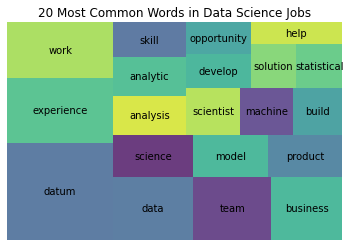

In [73]:
import squarify
top20 = count_df[count_df['rank'] <= 20]
squarify.plot(sizes = top20['pct_total'], label = count_df['word'], alpha = 0.8)
plt.axis('off')
plt.title('20 Most Common Words in Data Science Jobs')
plt.show()

In [99]:
sums = []
for col in vector1.columns:
  sums.append(vector1[col].sum())
temp = zip(vector1.columns, sums)
word_sums = pd.DataFrame(temp, columns = ['word', 'sums'])
word_sums = word_sums.sort_values(by='sums', ascending = False)
word_sums

,word,sums
18,datum,2875
28,experience,1923
97,work,1637
17,data,1402
90,team,1366
...,...,...
95,understanding,243
55,organization,242
33,impact,239
60,predictive,239


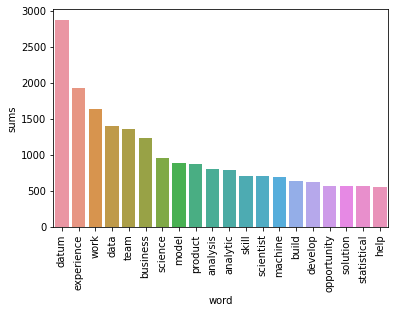

In [113]:
ax = sns.barplot(x=word_sums['word'][:20], y=word_sums['sums'][:20])
ax.tick_params(axis='x', rotation=90)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [115]:
def make_tfidf(column):
  text = []
  for row in column:
    text.append(row)

  vector = TfidfVectorizer(stop_words='english', max_features=100)
  vector.fit(text)
  transformed = vector.transform(text)
  dense = transformed.todense()

  df = pd.DataFrame(dense, columns = vector.get_feature_names())
  return df

In [118]:
dtm = make_tfidf(df['lemma_text'])

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [120]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=6, algorithm='kd_tree')
nn.fit(dtm)
# sample a doc from dtm to use as our query point
doc_index = 0
doc = [dtm.iloc[doc_index].values]

# Query Using kneighbors 
neigh_dist, neigh_index = nn.kneighbors(doc)

In [121]:
print(neigh_index)

[[  0 313 154 212 399 311]]


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 